In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
col = ['Vd','Id']
df = pd.read_csv('./csv/diodeData.csv', sep='\s+', names=col)
Vd = df['Vd']
Id = df['Id']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37601 entries, 0 to 37600
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vd      37601 non-null  float64
 1   Id      37601 non-null  float64
dtypes: float64(2)
memory usage: 587.6 KB


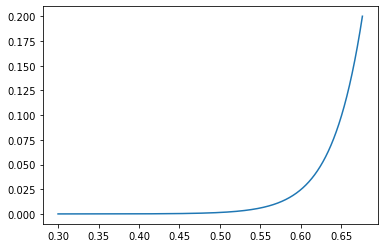

In [3]:
plt.plot(Vd,Id)
plt.show()

In [110]:
linId = np.log(Id)
linFit = np.polyfit(Vd,linId,1)
eta = 1 / (0.026 * linFit[0])
Is = np.exp(linFit[1])
print('Is = ', Is)
print('eta = ', eta)
IdExp = Is*(np.exp(Vd/(eta*0.026))-1)

from sklearn.metrics import r2_score

print(f'R2 = {r2_score(Id,IdExp)}')

Is =  1.0946391910707956e-09
eta =  1.3636808225869599
R2 = 0.9991123095613995


Text(0.5, 1.0, 'Modelo Exponencial')

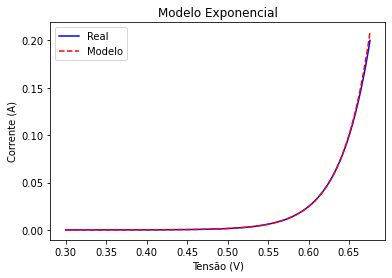

In [106]:
plt.figure(1)
plt.plot(Vd,Id, '-b')
plt.plot(Vd,IdExp, '--r')
plt.legend(['Real','Modelo'])
plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (A)')
plt.title('Modelo Exponencial')

In [62]:
arrV = df[['Vd']].to_numpy() # Converte para array
arrI = df[['Id']].to_numpy() # Converte para array
lim_V = arrV[33000:37601,-1] # Limita apenas o intervalo final
lim_I = arrI[33000:37601,-1] 

[ 3.04346313 -1.87291378]
Vd0 =  0.6153890164741879
rd =  0.3285730624991444


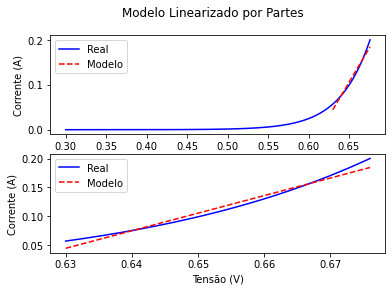

In [109]:
fit = np.polyfit(lim_V,lim_I,1)
print(fit)

rd = 1/fit[0]
Vd0 = -fit[1]/fit[0]
print('Vd0 = ', Vd0)
print('rd = ', rd)
idlin = lim_V/rd - Vd0/rd

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Modelo Linearizado por Partes')
ax1.plot(arrV,arrI, '-b', label='Real')
ax1.plot(lim_V,idlin, '--r', label='Modelo')
ax1.set(xlabel='Tensão (V)', ylabel='Corrente (A)')
ax1.legend(loc='upper left')

ax2.plot(lim_V,lim_I, '-b', label='Real')
ax2.plot(lim_V, idlin, '--r', label='Modelo')
ax2.set(xlabel='Tensão (V)', ylabel='Corrente (A)')
ax2.legend(loc='upper left')